### WIDS Datathon Project

#### EPA

In [1]:
pip install pandas-profiling


  Using cached MarkupSafe-2.1.1-cp39-cp39-win_amd64.whl (17 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Softwares\\Anaconda\\Lib\\site-packages\\~.rkupsafe\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


In [2]:
pip install markupsafe==2.0.1

  Using cached MarkupSafe-2.0.1-cp39-cp39-win_amd64.whl (14 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.0.1 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as dprof
from sklearn import preprocessing

%matplotlib inline
print('Imported libraries')


Imported libraries


In [4]:
pd.options.display.max_rows =300

In [5]:
'''Read the 1st Excel'''
excel_path_1='C:\Thripura\My_Personal\Self Learning\WIDS Datathon 2022 - Phase 2\Datathon_EPA_Air_Quality_Demographics_Meteorology_2019.xlsx'
df_1 = pd.read_excel(excel_path_1)
print(df_1.head())
print(df_1.count())


        AQS_ID   LATITUDE  LONGITUDE   COUNTY    STATE  \
0  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
1  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
2  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
3  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
4  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   

                        CBSA  PEOPLE_OF_COLOR_FRACTION  LOW_INCOME_FRACTION  \
0  Daphne-Fairhope-Foley, AL                      0.13                 0.26   
1  Daphne-Fairhope-Foley, AL                      0.13                 0.26   
2  Daphne-Fairhope-Foley, AL                      0.13                 0.26   
3  Daphne-Fairhope-Foley, AL                      0.13                 0.26   
4  Daphne-Fairhope-Foley, AL                      0.13                 0.26   

   LINGUISTICALLY_ISOLATED_FRACTION  LESS_THAN_HS_ED_FRACTION  ...  \
0                               0.0                      0.03  ...   
1                               0.0 

In [6]:
'''Read the 2nd Excel'''

excel_path_2='C:\Thripura\My_Personal\Self Learning\WIDS Datathon 2022 - Phase 2\Datathon_EPA_Air_Quality_Demographics_Meteorology_2020.xlsx'
df_2 = pd.read_excel(excel_path_2)
print(df_2.head())
print(df_2.count())

        AQS_ID   LATITUDE  LONGITUDE   COUNTY    STATE  \
0  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
1  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
2  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
3  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
4  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   

                        CBSA  PEOPLE_OF_COLOR_FRACTION  LOW_INCOME_FRACTION  \
0  Daphne-Fairhope-Foley, AL                      0.13                 0.26   
1  Daphne-Fairhope-Foley, AL                      0.13                 0.26   
2  Daphne-Fairhope-Foley, AL                      0.13                 0.26   
3  Daphne-Fairhope-Foley, AL                      0.13                 0.26   
4  Daphne-Fairhope-Foley, AL                      0.13                 0.26   

   LINGUISTICALLY_ISOLATED_FRACTION  LESS_THAN_HS_ED_FRACTION  ...  \
0                               0.0                      0.03  ...   
1                               0.0 

In [7]:
df_1.describe()

,LATITUDE,LONGITUDE,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,TEMPERATURE_CELSIUS,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
count,129470.000000,129470.000000,129393.000000,129393.000000,129393.000000,129393.000000,72703.000000,50670.000000,58576.000000,59484.000000,129470.000000,129470.000000,61395.000000,39749.000000,47337.000000,659.000000,3307.000000
mean,38.533022,-96.298816,0.383927,0.375089,0.049076,0.147154,13.576014,63.095606,2.250522,189.811975,6.962038,0.039954,7.211805,0.239979,0.504458,0.004382,0.996383
std,4.837426,17.693938,0.303357,0.215389,0.091215,0.129474,10.547154,18.520436,5.239192,62.589750,4.498417,0.011785,6.351797,0.158697,0.780967,0.004571,0.896393
min,18.420089,-158.088613,0.000000,0.000000,0.000000,0.000000,-34.814816,1.083333,0.000000,6.375000,-4.300000,0.000000,-3.565217,-0.395652,-1.412500,0.000000,0.000000
25%,35.320105,-112.095767,0.110000,0.210000,0.000000,0.060000,6.828704,51.375000,1.223949,147.372917,4.000000,0.032000,2.650000,0.147826,0.079167,0.002000,0.515000
50%,39.138773,-93.512534,0.320000,0.350000,0.010000,0.110000,14.791667,65.833333,1.843426,189.689583,6.100000,0.040000,5.386957,0.204167,0.308333,0.003000,0.800000
75%,41.530011,-80.341962,0.660000,0.540000,0.060000,0.200000,21.603009,76.666667,2.793005,234.041667,8.900000,0.048000,9.895833,0.295652,0.682609,0.006000,1.200000
max,64.845690,-66.150615,1.000000,0.990000,0.680000,0.720000,41.018520,114.079167,833.811646,349.791667,90.800000,0.099000,60.060870,1.813043,20.529167,0.046000,20.100000


In [8]:
df_2.describe()

,LATITUDE,LONGITUDE,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,TEMPERATURE_CELSIUS,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
count,133418.000000,133418.000000,133404.000000,133404.000000,133404.000000,133404.000000,71845.000000,49413.000000,59659.000000,60329.000000,133418.000000,133418.000000,64034.000000,40965.000000,47950.000000,421.000000,2806.000000
mean,38.396963,-96.290902,0.387406,0.376489,0.050916,0.146932,14.628471,60.331166,2.151579,191.810643,7.918043,0.038593,6.824960,0.246006,0.443637,0.005494,1.197436
std,4.753737,17.555206,0.304613,0.214970,0.094638,0.130830,9.979496,19.754614,1.410811,62.588574,8.657031,0.011923,6.141257,0.178923,0.608867,0.005059,1.969915
min,18.420089,-158.088613,0.000000,0.000000,0.000000,0.000000,-36.018517,3.541667,0.019292,2.416667,-4.900000,-0.001000,-4.125000,-0.400000,-2.604167,0.000000,0.000000
25%,35.240100,-112.191930,0.110000,0.210000,0.000000,0.060000,7.870371,46.750000,1.198227,151.250000,4.200000,0.031000,2.516667,0.142261,0.076190,0.002000,0.588000
50%,38.986672,-93.579965,0.320000,0.350000,0.010000,0.110000,15.349537,63.083333,1.798412,193.375000,6.300000,0.038000,4.926087,0.200591,0.291667,0.004000,0.843000
75%,41.495110,-80.395039,0.650000,0.530000,0.060000,0.200000,22.592592,75.333333,2.713695,236.208333,9.200000,0.046000,9.237500,0.308208,0.645833,0.007000,1.300000
max,64.845690,-66.150615,1.000000,0.990000,0.680000,0.720000,42.592594,100.112500,15.386176,352.958333,379.000000,0.125000,55.787500,2.667348,26.426087,0.044000,44.000000


In [9]:
df_1_CBSA=df_1.groupby('CBSA').mean()

In [10]:
df_1_CBSA

,LATITUDE,LONGITUDE,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,TEMPERATURE_CELSIUS,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
CBSA,,,,,,,,,,,,,,,,,
"Adrian, MI",41.995568,-83.946559,0.060000,0.370000,0.000000,0.090000,15.557159,NaN,2.184573,191.260675,7.382645,0.041045,NaN,NaN,NaN,NaN,NaN
"Albany-Schenectady-Troy, NY",42.680750,-73.757330,0.260000,0.160000,0.000000,0.060000,NaN,NaN,NaN,NaN,4.987850,0.035804,NaN,0.195741,0.151546,NaN,NaN
"Albuquerque, NM",35.112659,-106.583308,0.612628,0.436670,0.052884,0.159137,13.863065,39.793483,NaN,NaN,5.923814,0.046978,8.927723,0.165881,0.507035,NaN,NaN
"Allentown-Bethlehem-Easton, PA-NJ",40.724090,-75.277321,0.424054,0.350339,0.068768,0.138817,12.084646,67.123660,NaN,NaN,7.823375,0.036339,9.252731,NaN,0.260699,NaN,NaN
"Altoona, PA",40.535278,-78.370833,0.000000,0.470000,0.000000,0.230000,NaN,NaN,NaN,NaN,9.374333,0.037733,NaN,NaN,0.791850,NaN,NaN
"Ann Arbor, MI",42.240565,-83.599602,0.290000,0.440000,0.000000,0.080000,17.530400,NaN,1.810718,192.850151,7.365663,0.038536,NaN,NaN,NaN,NaN,NaN
"Appleton, WI",44.307380,-88.395178,0.040000,0.190000,0.030000,0.040000,NaN,NaN,NaN,NaN,6.921327,0.038232,NaN,NaN,NaN,NaN,NaN
"Ardmore, OK",34.244189,-97.462931,0.030000,0.710000,0.000000,0.200000,NaN,NaN,NaN,NaN,7.697026,0.044543,NaN,NaN,NaN,NaN,NaN
"Athens-Clarke County, GA",33.918137,-83.344385,0.220000,0.360000,0.000000,0.020000,NaN,NaN,NaN,NaN,10.303320,0.043793,NaN,NaN,NaN,NaN,NaN


In [11]:
df_2_CBSA=df_2.groupby('CBSA').mean()

In [15]:
df_2_CBSA.head(260)

,LATITUDE,LONGITUDE,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,TEMPERATURE_CELSIUS,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
CBSA,,,,,,,,,,,,,,,,,
"Adrian, MI",41.995568,-83.946559,0.060000,0.370000,0.000000,0.090000,14.703886,NaN,2.227503,192.387745,7.593333,0.040114,NaN,NaN,NaN,NaN,NaN
"Albany-Schenectady-Troy, NY",42.680750,-73.757330,0.260000,0.160000,0.000000,0.060000,NaN,NaN,NaN,NaN,4.930841,0.035720,NaN,NaN,0.190521,NaN,NaN
"Albuquerque, NM",35.112214,-106.583582,0.613386,0.436819,0.053302,0.159972,14.598636,34.781563,NaN,NaN,7.022919,0.045581,7.743553,0.177834,0.451799,NaN,NaN
"Allentown-Bethlehem-Easton, PA-NJ",40.725571,-75.276162,0.422777,0.350104,0.068727,0.139269,NaN,NaN,NaN,NaN,7.536013,0.034051,9.063141,NaN,0.369015,NaN,NaN
"Altoona, PA",40.535278,-78.370833,0.000000,0.470000,0.000000,0.230000,NaN,NaN,NaN,NaN,7.705740,0.037381,NaN,NaN,0.073821,NaN,NaN
"Ann Arbor, MI",42.240565,-83.599602,0.290000,0.440000,0.000000,0.080000,14.598907,NaN,1.992975,193.752316,7.833969,0.039641,NaN,NaN,NaN,NaN,NaN
"Appleton, WI",44.307380,-88.395178,0.040000,0.190000,0.030000,0.040000,NaN,NaN,NaN,NaN,6.464815,0.038398,NaN,NaN,NaN,NaN,NaN
"Ardmore, OK",34.244189,-97.462931,0.030000,0.710000,0.000000,0.200000,NaN,NaN,NaN,NaN,10.163569,0.043093,NaN,NaN,NaN,NaN,NaN
"Athens-Clarke County, GA",33.918137,-83.344385,0.220000,0.360000,0.000000,0.020000,NaN,NaN,NaN,NaN,8.227615,0.035540,NaN,NaN,NaN,NaN,NaN


'Riverside-San Bernardino-Ontario, CA'

,AQS_ID,LATITUDE,LONGITUDE,COUNTY,STATE,CBSA,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,...,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
16787,06-065-0009,33.447867,-117.088649,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.60,0.46,0.21,0.15,...,NaN,NaN,NaN,8.8,0.045,3.712500,NaN,NaN,NaN,NaN
16788,06-065-0009,33.447867,-117.088649,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.60,0.46,0.21,0.15,...,NaN,NaN,NaN,6.0,0.033,2.729167,NaN,NaN,NaN,NaN
16789,06-065-0009,33.447867,-117.088649,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.60,0.46,0.21,0.15,...,NaN,NaN,NaN,5.7,0.043,5.016667,NaN,NaN,NaN,NaN
16790,06-065-0009,33.447867,-117.088649,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.60,0.46,0.21,0.15,...,NaN,NaN,NaN,3.8,0.036,2.708333,NaN,NaN,NaN,NaN
16791,06-065-0009,33.447867,-117.088649,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.60,0.46,0.21,0.15,...,NaN,NaN,NaN,4.2,0.042,3.654167,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20725,06-071-9004,34.106678,-117.274063,San Bernardino,California,"Riverside-San Bernardino-Ontario, CA",0.97,0.71,0.14,0.60,...,NaN,NaN,NaN,11.3,0.026,22.491667,0.562500,NaN,0.008,NaN
20726,06-071-9004,34.106678,-117.274063,San Bernardino,California,"Riverside-San Bernardino-Ontario, CA",0.97,0.71,0.14,0.60,...,NaN,NaN,NaN,10.0,0.042,18.270833,0.554167,NaN,NaN,NaN
20727,06-071-9004,34.106678,-117.274063,San Bernardino,California,"Riverside-San Bernardino-Ontario, CA",0.97,0.71,0.14,0.60,...,NaN,NaN,NaN,11.3,0.040,18.987500,0.537500,NaN,0.008,NaN
20728,06-071-9004,34.106678,-117.274063,San Bernardino,California,"Riverside-San Bernardino-Ontario, CA",0.97,0.71,0.14,0.60,...,NaN,NaN,NaN,16.3,0.040,16.033333,0.629167,NaN,NaN,NaN


In [12]:
#df_1_NN = df_1.dropna()
#df_1_NN

In [13]:
#df_2_NN = df_2.dropna()
#df_2_NN

In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133418 entries, 0 to 133417
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   AQS_ID                            133418 non-null  object        
 1   LATITUDE                          133418 non-null  float64       
 2   LONGITUDE                         133418 non-null  float64       
 3   COUNTY                            133418 non-null  object        
 4   STATE                             133418 non-null  object        
 5   CBSA                              121424 non-null  object        
 6   PEOPLE_OF_COLOR_FRACTION          133404 non-null  float64       
 7   LOW_INCOME_FRACTION               133404 non-null  float64       
 8   LINGUISTICALLY_ISOLATED_FRACTION  133404 non-null  float64       
 9   LESS_THAN_HS_ED_FRACTION          133404 non-null  float64       
 10  DATE                            

In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129470 entries, 0 to 129469
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   AQS_ID                            129470 non-null  object        
 1   LATITUDE                          129470 non-null  float64       
 2   LONGITUDE                         129470 non-null  float64       
 3   COUNTY                            129470 non-null  object        
 4   STATE                             129470 non-null  object        
 5   CBSA                              117210 non-null  object        
 6   PEOPLE_OF_COLOR_FRACTION          129393 non-null  float64       
 7   LOW_INCOME_FRACTION               129393 non-null  float64       
 8   LINGUISTICALLY_ISOLATED_FRACTION  129393 non-null  float64       
 9   LESS_THAN_HS_ED_FRACTION          129393 non-null  float64       
 10  DATE                            

In [22]:
df_1.corr() 

,LATITUDE,LONGITUDE,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,TEMPERATURE_CELSIUS,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
LATITUDE,1.000000,0.189144,-0.462128,-0.215728,-0.220349,-0.267396,-0.416590,0.141049,0.052020,0.110537,-0.146103,-0.094163,-0.145869,-0.074972,0.194408,-0.202764,-0.061531
LONGITUDE,0.189144,1.000000,-0.226340,-0.106510,-0.230461,-0.152277,-0.075029,0.260830,0.014777,-0.035073,0.082632,-0.073068,-0.052587,-0.188091,-0.186386,-0.203958,-0.020450
PEOPLE_OF_COLOR_FRACTION,-0.462128,-0.226340,1.000000,0.510822,0.552322,0.605176,0.265387,-0.094116,-0.035338,-0.024500,0.156881,0.031789,0.351235,0.220231,-0.043104,0.157704,0.160934
LOW_INCOME_FRACTION,-0.215728,-0.106510,0.510822,1.000000,0.338428,0.592987,0.155956,-0.137221,-0.044728,-0.004188,0.131291,0.029000,0.224818,0.109275,0.006903,0.111215,0.232972
LINGUISTICALLY_ISOLATED_FRACTION,-0.220349,-0.230461,0.552322,0.338428,1.000000,0.636337,0.170888,-0.106379,0.025219,0.067068,0.069969,0.040867,0.246660,0.169589,-0.034074,0.187847,0.063838
LESS_THAN_HS_ED_FRACTION,-0.267396,-0.152277,0.605176,0.592987,0.636337,1.000000,0.184506,-0.050500,-0.020296,0.038286,0.138382,0.032111,0.243171,0.180706,-0.006144,0.180319,0.195223
TEMPERATURE_CELSIUS,-0.416590,-0.075029,0.265387,0.155956,0.170888,0.184506,1.000000,-0.245338,-0.057685,-0.045597,0.143382,0.401834,-0.046934,-0.098502,-0.126212,0.176116,-0.104959
RELATIVE_HUMIDITY,0.141049,0.260830,-0.094116,-0.137221,-0.106379,-0.050500,-0.245338,1.000000,-0.030303,-0.147767,0.052894,-0.460817,-0.086793,-0.065741,-0.133056,-0.319531,-0.079040
WIND_SPEED_METERS_PER_SECOND,0.052020,0.014777,-0.035338,-0.044728,0.025219,-0.020296,-0.057685,-0.030303,1.000000,0.046818,-0.064107,-0.012067,-0.067779,-0.050045,0.003894,-0.046302,-0.097525
WIND_DIRECTION,0.110537,-0.035073,-0.024500,-0.004188,0.067068,0.038286,-0.045597,-0.147767,0.046818,1.000000,-0.082139,0.104997,-0.079083,-0.102629,0.043386,-0.021161,-0.010566


In [17]:
'''# DF-1 All values
dataplot = sns.heatmap(df_1.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(50,20)})
# displaying heatmap
plt.show()
'''

'# DF-1 All values\ndataplot = sns.heatmap(df_1.corr(), cmap="YlGnBu", annot=True)\nsns.set(rc = {\'figure.figsize\':(50,20)})\n# displaying heatmap\nplt.show()\n'

In [16]:
'''# DF-2 All values
dataplot1 = sns.heatmap(df_2.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(15,8)})
# displaying heatmap
plt.show(dataplot1)
'''

'# DF-2 All values\ndataplot1 = sns.heatmap(df_2.corr(), cmap="YlGnBu", annot=True)\nsns.set(rc = {\'figure.figsize\':(15,8)})\n# displaying heatmap\nplt.show(dataplot1)\n'

In [18]:
'''# DF-1 Non null values only
dataplot3_NN = sns.heatmap(df_1_NN.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(15,8)})
# displaying heatmap
plt.show(dataplot3_NN)
'''

'# DF-1 Non null values only\ndataplot3_NN = sns.heatmap(df_1_NN.corr(), cmap="YlGnBu", annot=True)\nsns.set(rc = {\'figure.figsize\':(15,8)})\n# displaying heatmap\nplt.show(dataplot3_NN)\n'

In [19]:
'''# DF-2 Non null values only
dataplot4_NN = sns.heatmap(df_2_NN.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(15,8)})
# displaying heatmap
plt.show(dataplot4_NN)
'''

'# DF-2 Non null values only\ndataplot4_NN = sns.heatmap(df_2_NN.corr(), cmap="YlGnBu", annot=True)\nsns.set(rc = {\'figure.figsize\':(15,8)})\n# displaying heatmap\nplt.show(dataplot4_NN)\n'

In [20]:
'''
sns.pairplot(df_1)
sns.set(rc = {'figure.figsize':(100,80)})
plt.show()
'''

"\nsns.pairplot(df_1)\nsns.set(rc = {'figure.figsize':(100,80)})\nplt.show()\n"

In [52]:
df_Poll_1=df_1[['COUNTY','PM25_UG_PER_CUBIC_METER','OZONE_PPM']]       
df_Poll_1

,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM
0,Baldwin,3.8,0.029
1,Baldwin,6.5,0.034
2,Baldwin,8.6,0.053
3,Baldwin,7.5,0.030
4,Baldwin,8.8,0.046
...,...,...,...
129465,Bayamon,4.1,0.020
129466,Bayamon,4.5,0.022
129467,Bayamon,3.9,0.022
129468,Bayamon,6.1,0.020


In [53]:
df_Poll_2=df_2[['COUNTY','PM25_UG_PER_CUBIC_METER','OZONE_PPM']]       
df_Poll_2

,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM
0,Baldwin,5.2,0.051
1,Baldwin,3.0,0.035
2,Baldwin,6.5,0.041
3,Baldwin,6.7,0.045
4,Baldwin,4.8,0.033
...,...,...,...
133413,Bayamon,16.4,0.022
133414,Bayamon,2.5,0.017
133415,Bayamon,6.0,0.025
133416,Bayamon,6.9,0.020


In [54]:
'''df_NA_CBSE=df_1[df_1['CBSA'].notna()]
df_NA_CBSE
'''

"df_NA_CBSE=df_1[df_1['CBSA'].notna()]\ndf_NA_CBSE\n"

In [55]:
'''
df_NA_CBSE_2=df_2[df_2['CBSA'].notna()]
df_NA_CBSE_2
'''

"\ndf_NA_CBSE_2=df_2[df_2['CBSA'].notna()]\ndf_NA_CBSE_2\n"

In [56]:
#data profiling police employment data
data_prof = dprof.ProfileReport(df_Poll_1)
data_prof.to_file('./pe_data.html')

C:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
'''
#sample profiling command
data_prof = dprof.ProfileReport(pe_data)
data_prof.to_file('./pe_data.html')
'''

"\n#sample profiling command\ndata_prof = dprof.ProfileReport(pe_data)\ndata_prof.to_file('./pe_data.html')\n"

In [58]:
'''df_1_2019=df_1['CBSA','PEOPLE_OF_COLOR_FRACTION','LOW_INCOME_FRACTION','LINGUISTICALLY_ISOLATED_FRACTION','LESS_THAN_HS_ED_FRACTION','PM25_UG_PER_CUBIC_METER','OZONE_PPM']
'''

"df_1_2019=df_1['CBSA','PEOPLE_OF_COLOR_FRACTION','LOW_INCOME_FRACTION','LINGUISTICALLY_ISOLATED_FRACTION','LESS_THAN_HS_ED_FRACTION','PM25_UG_PER_CUBIC_METER','OZONE_PPM']\n"

In [59]:
df_Poll_1['Year'] = '2019'

C:\Users\050878~1\AppData\Local\Temp/ipykernel_97032/2884129948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Poll_1['Year'] = '2019'


In [60]:
df_Poll_1.head()

,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM,Year
0,Baldwin,3.8,0.029,2019
1,Baldwin,6.5,0.034,2019
2,Baldwin,8.6,0.053,2019
3,Baldwin,7.5,0.030,2019
4,Baldwin,8.8,0.046,2019


In [61]:
df_Poll_2['Year'] = '2020'

C:\Users\050878~1\AppData\Local\Temp/ipykernel_97032/3070489955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Poll_2['Year'] = '2020'


In [62]:
df_Poll_2.head()

,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM,Year
0,Baldwin,5.2,0.051,2020
1,Baldwin,3.0,0.035,2020
2,Baldwin,6.5,0.041,2020
3,Baldwin,6.7,0.045,2020
4,Baldwin,4.8,0.033,2020


In [63]:
df_Poll=df_Poll_1.append(df_Poll_2)

In [188]:
print(df_Poll)

         COUNTY  PM25_UG_PER_CUBIC_METER  OZONE_PPM  Year
0       Baldwin                      3.8      0.029  2019
1       Baldwin                      6.5      0.034  2019
2       Baldwin                      8.6      0.053  2019
3       Baldwin                      7.5      0.030  2019
4       Baldwin                      8.8      0.046  2019
...         ...                      ...        ...   ...
133413  Bayamon                     16.4      0.022  2020
133414  Bayamon                      2.5      0.017  2020
133415  Bayamon                      6.0      0.025  2020
133416  Bayamon                      6.9      0.020  2020
133417  Bayamon                      5.8      0.019  2020

[262888 rows x 4 columns]


In [65]:
df_Poll_1_PPM35=df_Poll_1[df_Poll_1['PM25_UG_PER_CUBIC_METER']>35]

In [78]:
df_Poll_2_PPM35=df_Poll_2[df_Poll_2['PM25_UG_PER_CUBIC_METER']>35]

COUNTY      PM25_UG_PER_CUBIC_METER  OZONE_PPM  Year
Ada         37.2                     0.059      2020    1
San Benito  84.8                     0.048      2020    1
            66.4                     0.040      2020    1
            65.9                     0.059      2020    1
                                     0.049      2020    1
                                                       ..
Kern        50.6                     0.080      2020    1
            48.9                     0.033      2020    1
            48.5                     0.022      2020    1
            47.3                     0.031      2020    1
Yolo        134.0                    0.054      2020    1
Length: 1467, dtype: int64

In [85]:
df_poll_PPM35_1=df_Poll_1_PPM35.groupby('COUNTY', as_index=False)['PM25_UG_PER_CUBIC_METER'].mean()

df_poll_PPM35_2=df_Poll_2_PPM35.groupby('COUNTY', as_index=False)['PM25_UG_PER_CUBIC_METER'].mean()
#df_poll_PPM35=df_poll_PPM35_1[df_poll_PPM35_1['PM25_UG_PER_CUBIC_METER']>35]

df_poll_PPM35_1.rename(columns = {'PM25_UG_PER_CUBIC_METER':'PM25_2019'}, inplace=True)


#df_poll_PPM35_2.rename(columns = {'PM25_UG_PER_CUBIC_METER':'PM25_2020'}, inplace=True)
df_PPM35_2=df_poll_PPM35_2

In [114]:
df_PPM35_1=df_poll_PPM35_1

In [189]:
df_PPM35_1

,COUNTY,PM25_2019
0,Beaver,48.200000
1,Berks,45.866667
2,Bibb,42.950000
3,Box Elder,38.800000
4,Cache,40.487500
5,Cass,57.250000
6,Chester,36.000000
7,Contra Costa,35.900000
8,Dauphin,50.200000
9,Davis,38.100000


### the counties where PPM2.5 levels have been high in both 2019 and 2020.

In [190]:


df_PPM35 =  pd.merge(df_PPM35_1, df_poll_PPM35_2,  how="inner", on=['COUNTY'])

In [191]:
df_PPM35

,COUNTY,PM25_2019,PM25_2020
0,Beaver,48.200000,52.300000
1,Berks,45.866667,35.900000
2,Cache,40.487500,45.600000
3,Cass,57.250000,37.100000
4,Contra Costa,35.900000,69.205000
5,Dauphin,50.200000,38.666667
6,Davis,38.100000,54.550000
7,Delaware,39.960000,36.650000
8,Denver,55.150000,42.760000
9,District of Columbia,52.600000,62.200000


In [130]:
#df_PPM35.info()
print('\nNo. of counties which exceeded PPM25 levels of 35microgram per cubic meter in both 2019 & 2020: \n',df_PPM35.shape[0])


No. of counties which exceeded PPM25 levels of 35microgram per cubic meter in both 2019 & 2020: 
 41


In [117]:
df_PPM35_All =  pd.merge(df_PPM35_1, df_poll_PPM35_2,  how="outer", on=['COUNTY'])

In [118]:
df_PPM35_All

,COUNTY,PM25_2019,PM25_2020
0,Beaver,48.200000,52.300000
1,Berks,45.866667,35.900000
2,Bibb,42.950000,NaN
3,Box Elder,38.800000,NaN
4,Cache,40.487500,45.600000
5,Cass,57.250000,37.100000
6,Chester,36.000000,NaN
7,Contra Costa,35.900000,69.205000
8,Dauphin,50.200000,38.666667
9,Davis,38.100000,54.550000


In [144]:
print('\nNo. of counties which exceeded PPM25 levels of 35microgram per cubic meter in  2019 but not in  2020: \n',
 len(df_PPM35_All) - df_PPM35_All.count())





No. of counties which exceeded PPM25 levels of 35microgram per cubic meter in  2019 but not in  2020: 
 COUNTY         0
PM25_2019    101
PM25_2020     10
dtype: int64
COUNTY       152
PM25_2019     51
PM25_2020    142
dtype: int64


In [145]:
len(df_PPM35_All)

152

In [146]:
print(df_PPM35_All.count())

COUNTY       152
PM25_2019     51
PM25_2020    142
dtype: int64


In [148]:
len(df_PPM35_All) - df_PPM35_All.PM25_2020.count()

10

In [153]:
df_PPM35['PM25_2019'].values

array([48.2       , 45.86666667, 40.4875    , 57.25      , 35.9       ,
       50.2       , 38.1       , 39.96      , 55.15      , 52.6       ,
       44.23333333, 54.85      , 40.24545455, 59.9       , 37.6       ,
       53.1       , 54.2       , 44.88461538, 40.71      , 44.31      ,
       49.06      , 35.5       , 53.        , 38.1       , 35.85      ,
       40.97857143, 39.8       , 41.33333333, 56.        , 36.15      ,
       43.98333333, 69.3       , 60.95      , 38.        , 39.        ,
       37.4       , 42.21666667, 37.9       , 36.5       , 36.        ,
       50.1       ])

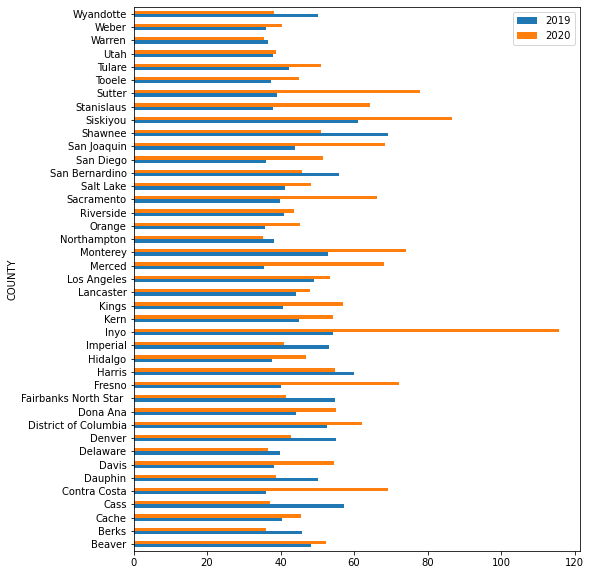

In [155]:
yr2019 = df_PPM35['PM25_2019'].values
yr2020= df_PPM35['PM25_2020'].values

county =df_PPM35['COUNTY']
df = pd.DataFrame({'2019': yr2019,
                   '2020': yr2020}, index=county)
ax = df.plot.barh(figsize=(8, 10))

In [180]:
yr2019_1 = df_PPM35_All['PM25_2019'].values
yr2020_1= df_PPM35_All['PM25_2020'].values

ax1 = df1.plot.barh(figsize=(80, 250))

county_1 =df_PPM35_All['COUNTY']
df1 = pd.DataFrame({'2019': yr2019_1,
                   '2020': yr2020_1}, index=county_1)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151]),
 [Text(0, 0, 'Beaver'),
  Text(0, 1, 'Berks'),
  Text(0, 2, 'Bibb'),
  Text(0, 3, 'Box Elder'),
  Text(0, 4, 'Cache'),
  Text(0, 5, 'Cass'),
 

In [ ]:
### Observation: Many counties have experienced higher PPM2.5 in 2020 than in 2019.

In [195]:
#df_poll_OZ


df_Poll_OZ_1=df_Poll_1[df_Poll_1['OZONE_PPM']>0.07]
df_poll_OZ_1=df_Poll_OZ_1.groupby('COUNTY', as_index=False)['OZONE_PPM'].mean()

df_Poll_OZ_2=df_Poll_2[df_Poll_2['OZONE_PPM']>0.07]

df_poll_OZ_2=df_Poll_OZ_2.groupby('COUNTY', as_index=False)['OZONE_PPM'].mean()

df_poll_OZ_1.rename(columns = {'OZONE_PPM':'OZ_2019'}, inplace=True)
df_poll_OZ_2.rename(columns = {'OZONE_PPM':'OZ_2020'}, inplace=True)

df_Poll_OZ_1
df_Poll_OZ_2


,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM,Year
1359,La Paz,4.3,0.071,2020
1712,Maricopa,7.7,0.073,2020
1732,Maricopa,6.6,0.076,2020
1814,Maricopa,12.7,0.079,2020
1819,Maricopa,17.9,0.089,2020
...,...,...,...,...
132617,Natrona,32.3,0.076,2020
132618,Natrona,23.5,0.071,2020
132959,Sublette,41.5,0.076,2020
133280,Sweetwater,27.2,0.074,2020


In [197]:
df_Poll_OZ_1
df_Poll_OZ_1=df_Poll_1[df_Poll_1['OZONE_PPM']>0.07]
df_OZ_1=df_Poll_OZ_1.groupby('COUNTY', as_index=False)['OZONE_PPM'].mean()
df_OZ_1

,COUNTY,OZONE_PPM
0,Alameda,0.073200
1,Allegan,0.072500
2,Anoka,0.077000
3,Atlantic,0.072000
4,Baltimore,0.073333
5,Becker,0.072000
6,Berks,0.076500
7,Bernalillo,0.072400
8,Bexar,0.076250
9,Bibb,0.076000


In [196]:
'''df_poll_OZ_1=df_Poll_OZ_1.groupby('COUNTY', as_index=False)['OZONE_PPM'].mean()

df_poll_OZ_2=df_Poll_2_PPM35.groupby('COUNTY', as_index=False)['PM25_UG_PER_CUBIC_METER'].mean()
#df_poll_PPM35=df_poll_PPM35_1[df_poll_PPM35_1['PM25_UG_PER_CUBIC_METER']>35]

df_poll_PPM35_1.rename(columns = {'PM25_UG_PER_CUBIC_METER':'PM25_2019'}, inplace=True)


#df_poll_PPM35_2.rename(columns = {'PM25_UG_PER_CUBIC_METER':'PM25_2020'}, inplace=True)
df_PPM35_2=df_poll_PPM35_2
'''

"df_poll_OZ_1=df_Poll_OZ_1.groupby('COUNTY', as_index=False)['OZONE_PPM'].mean()\n\ndf_poll_OZ_2=df_Poll_2_PPM35.groupby('COUNTY', as_index=False)['PM25_UG_PER_CUBIC_METER'].mean()\n#df_poll_PPM35=df_poll_PPM35_1[df_poll_PPM35_1['PM25_UG_PER_CUBIC_METER']>35]\n\ndf_poll_PPM35_1.rename(columns = {'PM25_UG_PER_CUBIC_METER':'PM25_2019'}, inplace=True)\n\n\n#df_poll_PPM35_2.rename(columns = {'PM25_UG_PER_CUBIC_METER':'PM25_2020'}, inplace=True)\ndf_PPM35_2=df_poll_PPM35_2\n"

,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM,Year
269,Jefferson,20.0,0.085,2019
322,Jefferson,14.9,0.071,2019
346,Jefferson,21.8,0.082,2019
349,Jefferson,10.3,0.075,2019
496,Jefferson,15.8,0.074,2019
...,...,...,...,...
125890,Milwaukee,18.4,0.072,2019
126103,Outagamie,21.6,0.072,2019
126300,Ozaukee,7.7,0.071,2019
126926,Waukesha,18.2,0.075,2019


In [194]:
df_Poll_OZ_2
df_Poll_OZ_2=df_Poll_2[df_Poll_2['OZONE_PPM']>0.07]
df_OZ_2=df_Poll_OZ_2.groupby('COUNTY', as_index=False)['OZONE_PPM'].mean()
df_OZ_2

,COUNTY,OZONE_PPM
0,Alameda,0.076000
1,Allegan,0.076333
2,Allegheny,0.072000
3,Allen,0.072000
4,Armstrong,0.074667
5,Baltimore,0.072000
6,Becker,0.071000
7,Bernalillo,0.072667
8,Bexar,0.071000
9,Bristol,0.072000


In [198]:


df_OZ =  pd.merge(df_OZ_1, df_OZ_2,  how="inner", on=['COUNTY'])

In [200]:

df_OZ.rename(columns = {'OZONE_PPM_x':'OZONE_2019'}, inplace=True)
df_OZ.rename(columns = {'OZONE_PPM_y':'OZONE_2020'}, inplace=True)
df_OZ

,COUNTY,OZONE_2019,OZONE_2020
0,Alameda,0.073200,0.076000
1,Allegan,0.072500,0.076333
2,Baltimore,0.073333,0.072000
3,Becker,0.072000,0.071000
4,Bernalillo,0.072400,0.072667
5,Bexar,0.076250,0.071000
6,Calaveras,0.073000,0.079000
7,Clark,0.072667,0.074595
8,Contra Costa,0.075250,0.076667
9,Daviess,0.071000,0.072000


In [203]:
## take outer join of 2019 and 2020
df_OZ_All =  pd.merge(df_OZ_1, df_OZ_2,  how="outer", on=['COUNTY'])


df_OZ_All.rename(columns = {'OZONE_PPM_x':'OZONE_2019'}, inplace=True)
df_OZ_All.rename(columns = {'OZONE_PPM_y':'OZONE_2020'}, inplace=True)
df_OZ_All

,COUNTY,OZONE_2019,OZONE_2020
0,Alameda,0.073200,0.076000
1,Allegan,0.072500,0.076333
2,Anoka,0.077000,NaN
3,Atlantic,0.072000,NaN
4,Baltimore,0.073333,0.072000
5,Becker,0.072000,0.071000
6,Berks,0.076500,NaN
7,Bernalillo,0.072400,0.072667
8,Bexar,0.076250,0.071000
9,Bibb,0.076000,NaN


In [209]:
df_OZ_All

yr2019oz = df_OZ_All['OZONE_2019'].values
yr2020oz= df_OZ_All['OZONE_2020'].values

county_2 =df_OZ_All['COUNTY']
df2 = pd.DataFrame({'2019': yr2019oz,
                   '2020': yr2020oz}, index=county_2)
ax2 = df2.plot.barh(figsize=(80, 250))

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)




(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174]),
 [Text(0, 0